In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [161]:
train_dir = "./custom_dataset-1/train/"
val_dir = "./custom_dataset-1/validation/"

train_files = os.listdir(train_dir)
train_files.sort()
val_files = os.listdir(val_dir)
val_files.sort()

print(train_files)
print(val_files)

train_image_paths = []
train_image_labels = []

['face_00.jpg', 'face_00.txt', 'face_01.jpg', 'face_01.txt', 'face_02.jpg', 'face_02.txt', 'face_03.jpg', 'face_03.txt', 'face_04.jpg', 'face_04.txt', 'face_05.jpg', 'face_05.txt', 'face_06.jpg', 'face_06.txt', 'face_07.jpg', 'face_07.txt', 'face_08.jpg', 'face_08.txt', 'face_09.jpg', 'face_09.txt', 'face_10.jpg', 'face_10.txt', 'face_12.jpg', 'face_12.txt', 'face_13.jpg', 'face_13.txt', 'face_14.jpg', 'face_14.txt', 'face_16.jpg', 'face_16.txt', 'face_17.jpg', 'face_17.txt', 'face_19.jpg', 'face_19.txt', 'face_23.jpg', 'face_23.txt', 'face_24.jpg', 'face_24.txt', 'face_25.jpg', 'face_25.txt', 'face_26.jpg', 'face_26.txt', 'face_27.jpg', 'face_27.txt', 'face_29.jpg', 'face_29.txt', 'face_30.jpg', 'face_30.txt']
['face_11.jpg', 'face_11.txt', 'face_15.jpg', 'face_15.txt', 'face_18.jpg', 'face_18.txt', 'face_20.jpg', 'face_20.txt', 'face_21.jpg', 'face_21.txt', 'face_22.jpg', 'face_22.txt', 'face_28.jpg', 'face_28.txt']


In [162]:
for i in train_files:
    if i.endswith(".jpg"):
        train_image_paths.append(train_dir + i)
    else:
        train_image_labels.append(train_dir + i)

val_image_paths = []
val_image_labels = []

for i in val_files:
    if i.endswith(".jpg"):
        val_image_paths.append(val_dir + i)
    else:
        val_image_labels.append(val_dir + i)

train_image_paths.sort()
train_image_labels.sort()
val_image_paths.sort()
val_image_labels.sort()

print(len(train_image_paths), len(train_image_labels))

24 24


In [163]:

train_images = []
train_images_resized = []
train_labels = []

val_images = []
val_images_resized = []
val_labels = []

IMAGE_SCALE_FACTOR = 4
O_IMG_WIDTH = 640
O_IMG_HEIGHT = 480

IMG_WIDTH = int(O_IMG_WIDTH / IMAGE_SCALE_FACTOR)
IMG_HEIGHT = int(O_IMG_HEIGHT / IMAGE_SCALE_FACTOR)


In [164]:

for image in train_image_paths:
    arr = np.array(plt.imread(image))
    arr = arr / 255
    train_images.append(arr)
    arr = arr[::IMAGE_SCALE_FACTOR, ::IMAGE_SCALE_FACTOR]
    train_images_resized.append(arr)

for image in val_image_paths:
    arr = np.array(plt.imread(image))
    arr = arr / 255
    val_images.append(arr)
    arr = arr[::IMAGE_SCALE_FACTOR, ::IMAGE_SCALE_FACTOR]
    val_images_resized.append(arr)

for label in train_image_labels:
    arr = np.loadtxt(label)
    train_labels.append(arr[1:])

for label in val_image_labels:
    arr = np.loadtxt(label)
    val_labels.append(arr[1:])

train_images = np.array(train_images)
train_images_resized = np.array(train_images_resized)

val_images = np.array(val_images)
val_images_resized = np.array(val_images_resized)

train_labels = np.array(train_labels)
val_labels = np.array(val_labels)


In [165]:
TRAIN = False


In [166]:
if TRAIN:
    print(" ------------- Importing TF ------------- ")

    import tensorflow as tf

    print("------------- Creating Model ------------- ")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='linear',
                            input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(4, activation='linear')
    ])

    print("------------- Compiling Model ------------- ")

    model.compile(optimizer='adam', loss='mse', metrics='accuracy')

    print("------------- Training Model ------------- ")

    model.fit(train_images, train_labels, epochs=10)


In [167]:
print("------------- Testing Model ------------- ")

from PIL import Image
from matplotlib import patches as patches


------------- Testing Model ------------- 


In [178]:
def drawPoint(x, y, w, h, c="r"):
    axis.add_patch(patches.Rectangle((int(x), int(y)), int(w), int(h), facecolor="none", edgecolor=c))

./custom_dataset-1/train/face_01.jpg ./custom_dataset-1/train/face_01.txt
640 480 0.5 0.4354166666666667 0.509375 0.6875


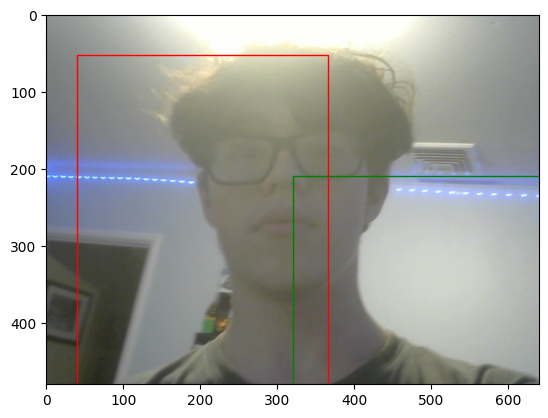

In [186]:

test_img = plt.imread(train_image_paths[1])
print(train_image_paths[1], train_image_labels[1])

label1 = np.loadtxt(train_image_labels[1])[1:]

figure, axis = plt.subplots()

x, y, w, h = label1

drawPoint(x*O_IMG_WIDTH, y*O_IMG_HEIGHT, w*O_IMG_WIDTH, h*O_IMG_WIDTH, "g")
drawPoint(x*80, y*120, w * O_IMG_WIDTH, h*O_IMG_WIDTH, "r")

print(O_IMG_WIDTH, O_IMG_HEIGHT, x, y, w, h)
axis.imshow(test_img)

plt.show()
